In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = "../data/customer_churn_dataset.csv"

In [ ]:
df = pd.read_csv(data)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


In [19]:
df = df.drop('CustomerID', axis=1)

### Identifica cuanta gente permanece o se va

/tmp/ipykernel_36104/1167037940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipykernel_36104/1167037940.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se queda', 'Se va'])


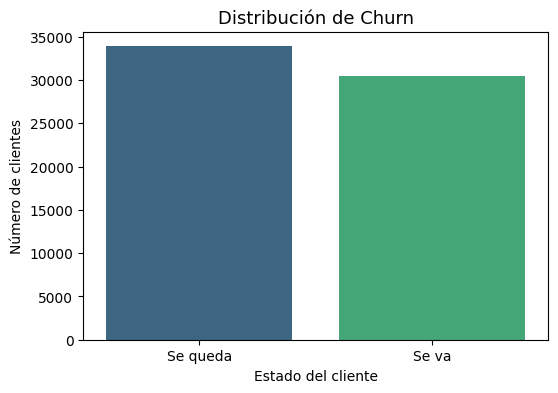

Distribución porcentual de Churn:
Churn
Se queda    52.631497
Se va       47.368503
Name: proportion, dtype: float64


In [25]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(
    x='Churn',
    data=df,
    palette='viridis'
)

ax.set_title('Distribución de Churn', fontsize=13)
ax.set_xlabel('Estado del cliente')
ax.set_ylabel('Número de clientes')

ax.set_xticklabels(['Se queda', 'Se va'])

plt.show()

churn_pct = df['Churn'].value_counts(normalize=True) * 100
print('Distribución porcentual de Churn:')
print(churn_pct.rename({0: 'Se queda', 1: 'Se va'}))


El resultado muestra que tenemos un 52.6% de clientes que permanecen y un 47.4% que se van.

### Tipos de contratos y permanencia

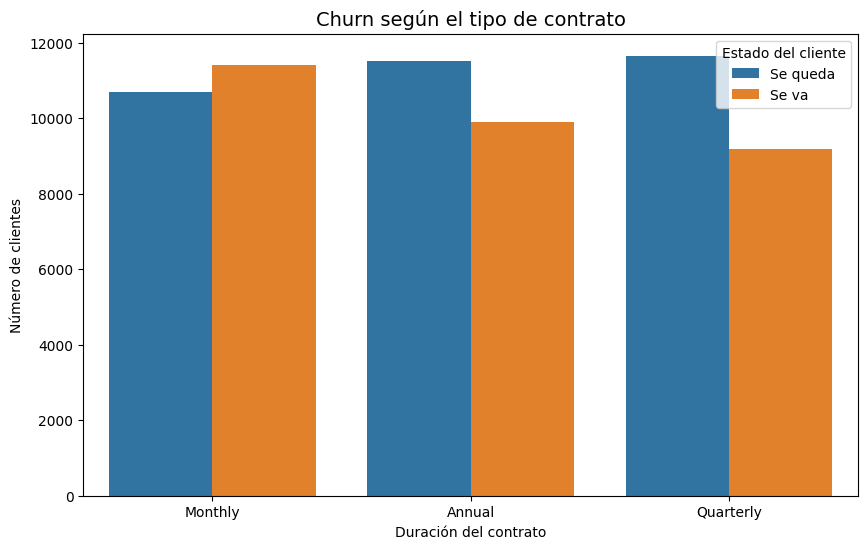

In [26]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Contract Length',hue='Churn',data=df)

# Títulos y etiquetas
ax.set_title('Churn según el tipo de contrato', fontsize=14)
ax.set_xlabel('Duración del contrato')
ax.set_ylabel('Número de clientes')

# Personalizar la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['Se queda', 'Se va'],
    title='Estado del cliente'
)

plt.show()


Como se observa en la gráfica, los contratos Mensuales (Monthly) tienen una proporción de fuga mucho mayor que los Anuales o Trimestrales. De hecho, en el contrato mensual, hay más personas que se van a las que permanecen